## **`Linear Regression`**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data from csv file
admission_cv = pd.read_csv('College_Admissions.csv')

#description of the data
admission_cv.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [3]:
#Droping the columns which are not important (not considered)
admission_cv.drop(labels=['Serial No.','University Rating','Research'], axis=1, inplace=True)

In [4]:
admission_cv

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...
395,324,110,3.5,3.5,9.04,0.82
396,325,107,3.0,3.5,9.11,0.84
397,330,116,5.0,4.5,9.45,0.91
398,312,103,3.5,4.0,8.78,0.67


<AxesSubplot:>

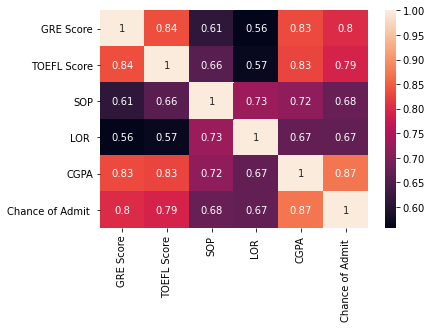

In [5]:
#plotting covariance matrix to see the covariance among different colums
sns.heatmap(admission_cv.corr(), annot=True)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
X = admission_cv.iloc[:, :-1]
y = admission_cv.iloc[:, -1]
from sklearn.utils import shuffle
X, y = shuffle(X, y)

#spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [8]:
#Scalling the data
ss = StandardScaler()

#applying fit_transform to training data and transform to testing data as it won't change the mean and variance
X_train, X_test = ss.fit_transform(X_train), ss.transform(X_test) 
pd.DataFrame(X_test) # getting a glimpse

,0,1,2,3,4
0,-0.194085,-0.445424,-1.403667,-1.105456,-0.242493
1,-1.839884,-2.091335,-0.419716,-1.663415,-1.775855
2,1.624956,1.694259,1.056210,1.684338,1.470304
3,1.451714,1.365077,0.564234,-0.547497,-1.025486
4,-1.406779,-0.280833,-0.911692,-0.547497,-0.258806
...,...,...,...,...,...
75,0.498883,-0.116242,0.072259,0.010462,-0.128307
76,0.152399,0.048349,-0.419716,0.010462,-0.144619
77,0.152399,-0.445424,-0.419716,0.010462,0.067441
78,-0.713811,-1.432971,0.564234,0.568421,-0.111995


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#applying linear regression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = LR.predict(X_train)


In [11]:
LR_score = LR.score(X_test,y_test) 

In [12]:
n_train=len(X_train)  
n_test=len(X_test)

#calculated MSE of training data
train_MSE = 1/n_train*sum((y_train-y_pred_train)**2)
train_MSE

0.0041742938784538304

In [13]:
#calculated MSE of testing data
test_MSE = 1/n_test*sum((y_test-y_pred)**2)  
test_MSE

0.003967271299117479

In [14]:
#coefficient of each considered column (the most affecting column is CGPA in prediction)
pd.DataFrame(index=X.columns.values, data=LR.coef_, columns = ['coefficient'])

,coefficient
GRE Score,0.021000
TOEFL Score,0.015823
SOP,0.007858
LOR,0.017535
CGPA,0.078469


<BarContainer object of 5 artists>

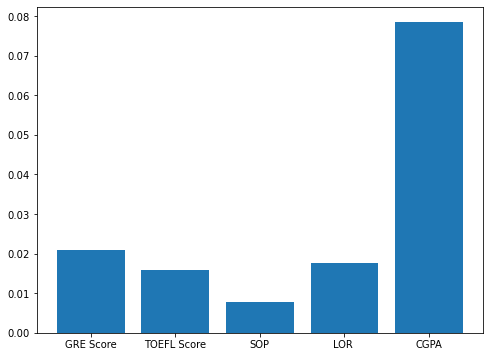

In [15]:
#visualizing coefficients
plt.figure(figsize=(8,6))
plt.bar(X.columns.values, LR.coef_)

# Applying PCA for linear regression

In [16]:
from sklearn.decomposition import PCA 

In [17]:
y_pca = admission_cv['Chance of Admit ']
X_pca = admission_cv.iloc[:, :-1]

In [18]:
#Variance of each column
pca_all = PCA()
X_PCA_all = pca_all.fit_transform(X_pca)
pca_all.explained_variance_ratio_   


array([9.39071173e-01, 5.40809848e-02, 5.04739274e-03, 1.39577421e-03,
       4.04675525e-04])

In [19]:
#chosing first two principle components as it explains almost 88% of data
pca = PCA(n_components=2)
pca.fit(X_pca)
X_PCA = pca.transform(X_pca)

X_PCA = pd.DataFrame(X_PCA, columns=['PC1', 'PC2'])

377
81


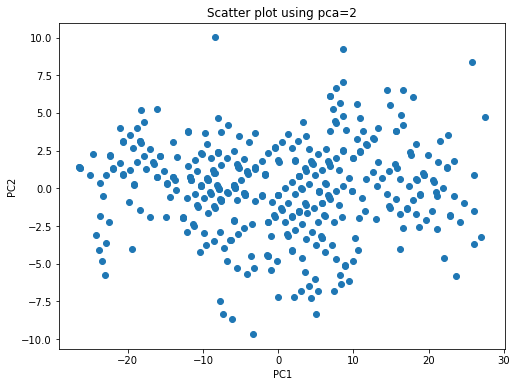

In [20]:
#scatter plot of data using pca=2
plt.figure(figsize=(8, 6))
plt.scatter(X_PCA['PC1'], X_PCA['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot using pca=2')

PCA_max = np.argmax(X_PCA['PC1'])
PCA_min = np.argmin(X_PCA['PC1'])

print(PCA_max)
print(PCA_min)

In [21]:
#Apply scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)


In [22]:
pd.DataFrame(X_pca)

,0,1,2,3,4
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029
...,...,...,...,...,...
395,0.627656,0.427257,0.099442,0.052933,0.740592
396,0.714922,-0.067635,-0.397769,0.052933,0.858126
397,1.151249,1.417042,1.591075,1.167321,1.429006
398,-0.419528,-0.727492,0.099442,0.610127,0.304036


In [23]:
#spliting in train and test data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, train_size=0.8, shuffle=True)


In [24]:
#apply linear regression using principle components
model = LinearRegression()
model.fit(X_train_pca, y_train_pca)

LinearRegression()

In [25]:
#model score
LR_PCA_score = model.score(X_test_pca, y_test_pca)

In [26]:
#predicted values of training and testing 
pred_train_pca = model.predict(X_train_pca)
pred_test_pca = model.predict(X_test_pca)

In [27]:
#calculating MSE of training data
n_train_pca=len(X_train_pca)  
n_test_pca=len(X_test_pca)

pca_train_MSE = 1/n_train_pca*sum((y_train_pca-pred_train_pca)**2)
pca_train_MSE


0.004244813045478053

In [28]:
#calculating MSE of testing data
pca_test_MSE = 1/n_test_pca*sum((y_test_pca-pred_test_pca)**2) 
pca_test_MSE

0.003608167795482937

Text(0, 0.5, 'Actual value')

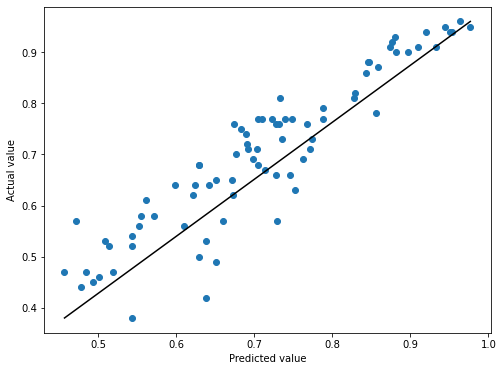

In [29]:
#fitting regression line(decision boundry) in scatter plot
plt.figure(figsize=(8, 6))
plt.plot(pred_test_pca, y_test_pca, 'o')
plt.xlabel('Predicted value')
plt.plot([min(pred_test_pca), max(pred_test_pca)], [min(y_test_pca), max(y_test_pca)], color = 'black')
plt.ylabel('Actual value')

In [30]:
print(LR_score,LR_PCA_score) 
print('appliying pca improves our model score') 

0.7640600485218347 0.8420154227358346
appliying pca improves our model score


In [31]:
y_pred #predicted values of testing data of Linear regression

array([0.66999588, 0.4870193 , 0.94470193, 0.69701209, 0.65950419,
       0.78031148, 0.44353424, 0.55752765, 0.66143057, 0.88305603,
       0.59757122, 0.95636265, 0.63819199, 0.74011391, 0.95537213,
       0.754683  , 0.72597117, 0.85638934, 0.59357211, 0.45060611,
       0.84442101, 0.61582825, 0.71652328, 0.9520971 , 0.6543441 ,
       0.7216398 , 0.51390983, 0.66296171, 0.67227436, 0.56145259,
       0.62966896, 0.64408958, 0.69933275, 0.76647768, 0.80715315,
       0.75304683, 0.68603138, 0.79556388, 0.69307258, 0.65296436,
       0.69257085, 0.66100528, 0.54316737, 0.60868609, 0.79635261,
       0.73429364, 0.74185574, 0.73770585, 0.77674952, 0.607919  ,
       0.65673502, 0.80468732, 0.7311152 , 0.77003282, 0.57177669,
       0.67986469, 0.6351577 , 0.64972574, 0.5966791 , 0.79124928,
       0.6532005 , 0.58849072, 0.80680939, 0.8193439 , 0.82595394,
       0.62882927, 0.70930054, 0.55786124, 0.56607477, 0.64144875,
       0.61544241, 0.84369342, 0.81949234, 0.75303542, 0.59674

In [32]:
pred_test_pca #predicted values of testing data of Linear regression with PCA

array([0.47727157, 0.73319288, 0.85560197, 0.73960606, 0.73503415,
       0.50855286, 0.76163006, 0.74765861, 0.90925358, 0.49350655,
       0.84656078, 0.82868577, 0.7288351 , 0.69846484, 0.45647786,
       0.84598487, 0.72219569, 0.6376372 , 0.88100019, 0.91988434,
       0.89717547, 0.6513355 , 0.72762694, 0.95318778, 0.65013414,
       0.95055131, 0.87370056, 0.50024312, 0.5425867 , 0.62393075,
       0.63726662, 0.48378593, 0.72739469, 0.62854504, 0.69196157,
       0.62075109, 0.7314948 , 0.64158118, 0.94422817, 0.82702343,
       0.62951985, 0.68947617, 0.68291429, 0.51847409, 0.70930158,
       0.87655615, 0.78837629, 0.67579634, 0.74578183, 0.57097972,
       0.55263572, 0.97672843, 0.70491104, 0.96410869, 0.75160165,
       0.65971154, 0.88069979, 0.8580718 , 0.77439843, 0.93227162,
       0.7718139 , 0.6908812 , 0.54332377, 0.67139316, 0.5545745 ,
       0.76752942, 0.47120628, 0.51351187, 0.62908463, 0.84281331,
       0.59870688, 0.67205167, 0.71370338, 0.61021951, 0.54287

In [34]:
LR_predictions = pd.DataFrame(y_pred, columns=['LR_predictions']).to_csv('LR_predictions.csv')

In [35]:
LR_PCA_predictions = pd.DataFrame(pred_test_pca, columns=['LR_PCA_predictions']).to_csv('LR_PCA_predictions.csv')